# 📊 Análise Estatística e Modelagem de Risco de Crédito

Este projeto apresenta uma **análise estatística aplicada** sobre risco de inadimplência utilizando o dataset *Default of Credit Card Clients (UCI)*. O estudo emprega **Estatística Descritiva, Probabilidade, Distribuições Estatísticas, Inferência Estatística e Testes de Hipóteses** para investigar **quais fatores estão associados à inadimplência** e como quantificar o risco **antes da adoção de modelos preditivos mais complexos**.

Ao longo do trabalho, foram realizadas etapas de limpeza e padronização dos dados, segmentação por grupos (inadimplentes e não inadimplentes) e validações estatísticas formais, resultando em **insights consistentes e interpretáveis**, alinhados a decisões reais de crédito.

> **Nota metodológica:** como o dataset não contém informação direta de renda, o `LIMIT_BAL` (limite de crédito) foi utilizado como **proxy de capacidade financeira** do cliente.

---

## 📂 Descrição do Conjunto de Dados

O dataset reúne informações financeiras, demográficas e comportamentais de clientes, com o objetivo de analisar eventos de inadimplência no período subsequente.

**Principais grupos de variáveis:**
- **Variável alvo**
  - `DEFAULT`: 0 = não inadimplente, 1 = inadimplente
- **Capacidade financeira (proxy)**
  - `LIMIT_BAL` — limite de crédito
- **Perfil demográfico**
  - `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`
- **Histórico de pagamento**
  - `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`
- **Faturas e pagamentos**
  - `BILL_AMT1..6`, `PAY_AMT1..6`

Essas variáveis permitem avaliar diferenças entre grupos e identificar associações estatísticas com o risco de inadimplência.

---

## 🎯 Objetivos

O projeto teve como foco:

- Aplicar **Estatística Descritiva** para caracterizar e comparar perfis de clientes  
- Estimar **probabilidades marginais e condicionais** de inadimplência  
- Avaliar padrões por meio de **distribuições estatísticas**  
- Construir **intervalos de confiança** para médias e proporções relevantes  
- Realizar **testes de hipóteses** para validar diferenças entre grupos  
- Gerar **insights explicáveis** para apoiar decisões de crédito  

---

## 🧪 Metodologia

### 🔹 Pré-processamento
- Ajuste do cabeçalho e padronização dos nomes das colunas  
- Conversão e validação de tipos de dados  
- Verificação de consistência e intervalos esperados  

### 🔹 Estatística Descritiva (ETAPA 1)
- Medidas de tendência central: **média, mediana e moda**  
- Medidas de dispersão: **variância, desvio padrão, quartis e IQR**  
- **Correlação de Pearson** para análise inicial de associações  
- Comparação direta entre clientes inadimplentes e não inadimplentes  

### 🔹 Probabilidade (ETAPA 2)
- Probabilidade marginal de inadimplência  
- Probabilidades condicionais baseadas em evidências observadas  
- Aplicação da **Regra do Produto**  
- Uso da **Regra de Bayes** para atualização de probabilidades  

### 🔹 Distribuições Estatísticas (ETAPA 3)
- Avaliação de aderência das variáveis a distribuições teóricas:
  - **Normal** (ex.: `AGE`, `LIMIT_BAL`)  
  - **Binomial/Bernoulli** (`DEFAULT`)  
  - **Poisson** (contagem de eventos de atraso)  

### 🔹 Inferência Estatística (ETAPA 4)
- Intervalos de confiança para médias e proporções  
- Interpretação estatística com foco em incerteza e generalização  

### 🔹 Testes de Hipóteses (ETAPA 5)
- Teste t (Welch) para comparação de médias  
- Teste Qui-quadrado para associação entre variáveis categóricas  
- ANOVA, quando aplicável, para comparação entre múltiplos grupos  

---

## 📌 Principais Resultados

### Diferenças entre grupos
- Clientes inadimplentes apresentaram **menor valor médio de `LIMIT_BAL`**, sugerindo associação entre capacidade financeira (proxy) e risco de inadimplência.
- Diferenças na **dispersão de idade** indicaram perfis etários distintos entre os grupos.

### Probabilidade e risco
- Probabilidades marginais e condicionais permitiram quantificar o risco e demonstrar como determinadas evidências elevam a chance de inadimplência.

### Evidências estatísticas
- Intervalos de confiança e testes de hipóteses forneceram suporte estatístico às diferenças observadas, reduzindo conclusões baseadas apenas em observação descritiva.

---

## 💡 Insights de Negócio

A análise estatística sugere que:

- O **histórico de pagamento** é um dos principais indicadores de risco  
- Medidas simples e explicáveis podem apoiar regras de concessão e monitoramento de crédito  
- Abordagens estatísticas fornecem base sólida antes da adoção de modelos preditivos mais complexos  

---

## 🧠 Considerações Finais

A aplicação rigorosa de estatística permite compreender o risco de inadimplência de forma **transparente e interpretável**.  
Antes de automatizar decisões, entender os padrões, a incerteza e as relações presentes nos dados é essencial para uma gestão de crédito mais eficiente.

In [ ]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar dados
df = pd.read_excel('/content/default of credit card clients.xls')

# Visualização de dados
display(df.head(10))

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


# Limpeza e pré processamento de dados:

In [ ]:
# Extrair os nomes das colunas da primeira linha (índice 0)

# Os nomes reais das colunas estão na primeira linha do DataFrame atual.
# Convertemos para lista para garantir que os nomes são strings e não objetos Series.
new_columns = df.iloc[0].tolist()

# Atribuir os novos nomes ao cabeçalho do DataFrame
df.columns = new_columns # Isso renomeia as colunas do DataFrame com os nomes extraídos.

# Remover a primeira linha, que agora é desnecessária, pois seus valores foram usados como cabeçalhos
df = df.iloc[1:].copy()
# Utilizamos iloc para remover a linha no índice 0.


# Resetar o índice do DataFrame após a remoção da primeira linha
# Isso garante que o DataFrame tenha um índice contínuo e limpo.
df.reset_index(drop=True, inplace=True)

#  Exibir as primeiras linhas do DataFrame com os novos cabeçalhos para verificação
display(df.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df = df.rename(columns={'default payment next month': 'DEFAULT'})

# Exibir as primeiras linhas do DataFrame para verificar a mudança do nome da coluna
display(df.head())

# Exibir as informações do DataFrame para verificar o nome da coluna e os tipos de dados
df.info()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  object
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  object
 6   PAY_0      30000 non-null  object
 7   PAY_2      30000 non-null  object
 8   PAY_3      30000 non-null  object
 9   PAY_4      30000 non-null  object
 10  PAY_5      30000 non-null  object
 11  PAY_6      30000 non-null  object
 12  BILL_AMT1  30000 non-null  object
 13  BILL_AMT2  30000 non-null  object
 14  BILL_AMT3  30000 non-null  object
 15  BILL_AMT4  30000 non-null  object
 16  BILL_AMT5  30000 non-null  object
 17  BILL_AMT6  30000 non-null  object
 18  PAY_AMT1   30000 non-null  object
 19  PAY_AMT2   30000 non-null  object
 20  PAY_AMT3   30000 non-null  o

In [ ]:
numeric_cols = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
categorical_cols = [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'DEFAULT'
]

# Converter colunas numéricas para tipo inteiro
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    # Usando 'Int64' para permitir possíveis valores NaN, embora não sejam esperados aqui.

# Converter colunas categóricas para o tipo inteiro (elas representam códigos)
for col in categorical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') # Usando 'Int64' para consistência

# O ID também pode ser convertido para Int64 se for puramente numérico.
df['ID'] = pd.to_numeric(df['ID'], errors='coerce').astype('Int64')

# Exibir tipos de dados após a conversão
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  Int64
 1   LIMIT_BAL  30000 non-null  Int64
 2   SEX        30000 non-null  Int64
 3   EDUCATION  30000 non-null  Int64
 4   MARRIAGE   30000 non-null  Int64
 5   AGE        30000 non-null  Int64
 6   PAY_0      30000 non-null  Int64
 7   PAY_2      30000 non-null  Int64
 8   PAY_3      30000 non-null  Int64
 9   PAY_4      30000 non-null  Int64
 10  PAY_5      30000 non-null  Int64
 11  PAY_6      30000 non-null  Int64
 12  BILL_AMT1  30000 non-null  Int64
 13  BILL_AMT2  30000 non-null  Int64
 14  BILL_AMT3  30000 non-null  Int64
 15  BILL_AMT4  30000 non-null  Int64
 16  BILL_AMT5  30000 non-null  Int64
 17  BILL_AMT6  30000 non-null  Int64
 18  PAY_AMT1   30000 non-null  Int64
 19  PAY_AMT2   30000 non-null  Int64
 20  PAY_AMT3   30000 non-null  Int64
 21  PAY_AMT4   3

In [ ]:
# Exibir estatísticas descritivas para verificar intervalos numéricos
display(df.describe())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.5,167484.322667,1.603733,1.853133,1.551867,35.4855,-0.0167,-0.133767,-0.1662,-0.220667,...,43262.948967,40311.400967,38871.7604,5663.5805,5921.1635,5225.6815,4826.076867,4799.387633,5215.502567,0.2212
std,8660.398374,129747.661567,0.489129,0.790349,0.52197,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.15577,59554.107537,16563.280354,23040.870402,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7500.75,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,2326.75,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.5,117.75,0.0
50%,15000.5,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.5,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.25,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,54506.0,50190.5,49198.25,5006.0,5000.0,4505.0,4013.25,4031.5,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


# ETAPA 1 — Estatística Descritiva
Objetivo: entender os dados antes de qualquer modelo.

* Média, mediana, moda

* Variância e desvio padrão

* Quartis e IQR

* Correlação (Pearson)

Perguntas que você deve responder;

Clientes inadimplentes têm renda média menor?

A dispersão de idade é diferente entre inadimplentes e não inadimplentes?

In [ ]:
# Lista de colunas numéricas identificadas anteriormente
numeric_cols = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Inicializar um dicionário para armazenar as estatísticas descritivas
descriptive_stats = {}

# Iterar sobre cada coluna numérica para calcular as estatísticas
print("Calculando Estatísticas Descritivas Completas para as colunas numéricas...\n")
for col in numeric_cols:
    # Calcular média
    mean_val = df[col].mean()

    # Calcular mediana
    median_val = df[col].median()

    # Calcular moda (pode haver múltiplas modas, pegamos a primeira ou indicamos se há mais)
    mode_val_series = df[col].mode()
    if len(mode_val_series) == 1:
        mode_val = mode_val_series[0]
    elif len(mode_val_series) > 1:
        mode_val = f"{mode_val_series.tolist()} (Múltiplas Modas)"
    else:
        mode_val = np.nan # Caso não haja moda (o que é raro para dados numéricos não-contínuos)

    # Calcular desvio padrão
    std_val = df[col].std()

    # Calcular variância
    var_val = df[col].var()

    # Calcular o primeiro quartil (Q1)
    q1_val = df[col].quantile(0.25)

    # Calcular o terceiro quartil (Q3)
    q3_val = df[col].quantile(0.75)

    # Calcular o Intervalo Interquartil (IQR)
    iqr_val = q3_val - q1_val

    # Armazenar as estatísticas no dicionário
    descriptive_stats[col] = {
        'Média': mean_val,
        'Mediana': median_val,
        'Moda': mode_val,
        'Desvio Padrão': std_val,
        'Variância': var_val,
        'Q1 (25%)': q1_val,
        'Q3 (75%)': q3_val,
        'IQR': iqr_val
    }

# Converter o dicionário de estatísticas para um DataFrame para melhor visualização
df_descriptive_stats = pd.DataFrame(descriptive_stats).transpose()

# Exibir as estatísticas descritivas completas
print("Estatísticas Descritivas Completas:")
display(df_descriptive_stats)

# Opcional: Adicionar a saída do .describe() para comparação e informações adicionais (min/max/count)
print("\nEstatísticas básicas do método .describe():")
display(df[numeric_cols].describe())

Calculando Estatísticas Descritivas Completas para as colunas numéricas...

Estatísticas Descritivas Completas:


,Média,Mediana,Moda,Desvio Padrão,Variância,Q1 (25%),Q3 (75%),IQR
LIMIT_BAL,167484.322667,140000.0,50000.0,129747.661567,1.683446e+10,50000.00,240000.00,190000.00
AGE,35.485500,34.0,29.0,9.217904,8.496976e+01,28.00,41.00,13.00
BILL_AMT1,51223.330900,22381.5,0.0,73635.860576,5.422240e+09,3558.75,67091.00,63532.25
BILL_AMT2,49179.075167,21200.0,0.0,71173.768783,5.065705e+09,2984.75,64006.25,61021.50
BILL_AMT3,47013.154800,20088.5,0.0,69349.387427,4.809338e+09,2666.25,60164.75,57498.50
BILL_AMT4,43262.948967,19052.0,0.0,64332.856134,4.138716e+09,2326.75,54506.00,52179.25
BILL_AMT5,40311.400967,18104.5,0.0,60797.155770,3.696294e+09,1763.00,50190.50,48427.50
BILL_AMT6,38871.760400,17071.0,0.0,59554.107537,3.546692e+09,1256.00,49198.25,47942.25
PAY_AMT1,5663.580500,2100.0,0.0,16563.280354,2.743423e+08,1000.00,5006.00,4006.00
PAY_AMT2,5921.163500,2009.0,0.0,23040.870402,5.308817e+08,833.00,5000.00,4167.00



Estatísticas básicas do método .describe():


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,167484.322667,35.4855,51223.3309,49179.075167,47013.1548,43262.948967,40311.400967,38871.7604,5663.5805,5921.1635,5225.6815,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,69349.387427,64332.856134,60797.15577,59554.107537,16563.280354,23040.870402,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.0,21.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,50000.0,28.0,3558.75,2984.75,2666.25,2326.75,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.5,117.75
50%,140000.0,34.0,22381.5,21200.0,20088.5,19052.0,18104.5,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,240000.0,41.0,67091.0,64006.25,60164.75,54506.0,50190.5,49198.25,5006.0,5000.0,4505.0,4013.25,4031.5,4000.0
max,1000000.0,79.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


# Correlação de Pearson

In [ ]:
# Combine as colunas numéricas e a coluna 'DEFAULT' para análise de correlação.
correlation_cols = numeric_cols + ['DEFAULT']

# Selecionar as colunas numéricas e a variável alvo 'DEFAULT'
# Certificar que todas as colunas estão no formato numérico adequado (já foram convertidas para Int64, o que é apropriado para cálculo de correlação)

df_corr = df[correlation_cols]

# Calcular a matriz de correlação de Pearson
correlation_matrix = df_corr.corr(method='pearson')

# Exibir a matriz de correlação completa
print("Matriz de Correlação de Pearson Completa:")
display(correlation_matrix)

Matriz de Correlação de Pearson Completa:


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,-0.014076
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,-0.010156
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184,-0.006760
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494,-0.005372
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579


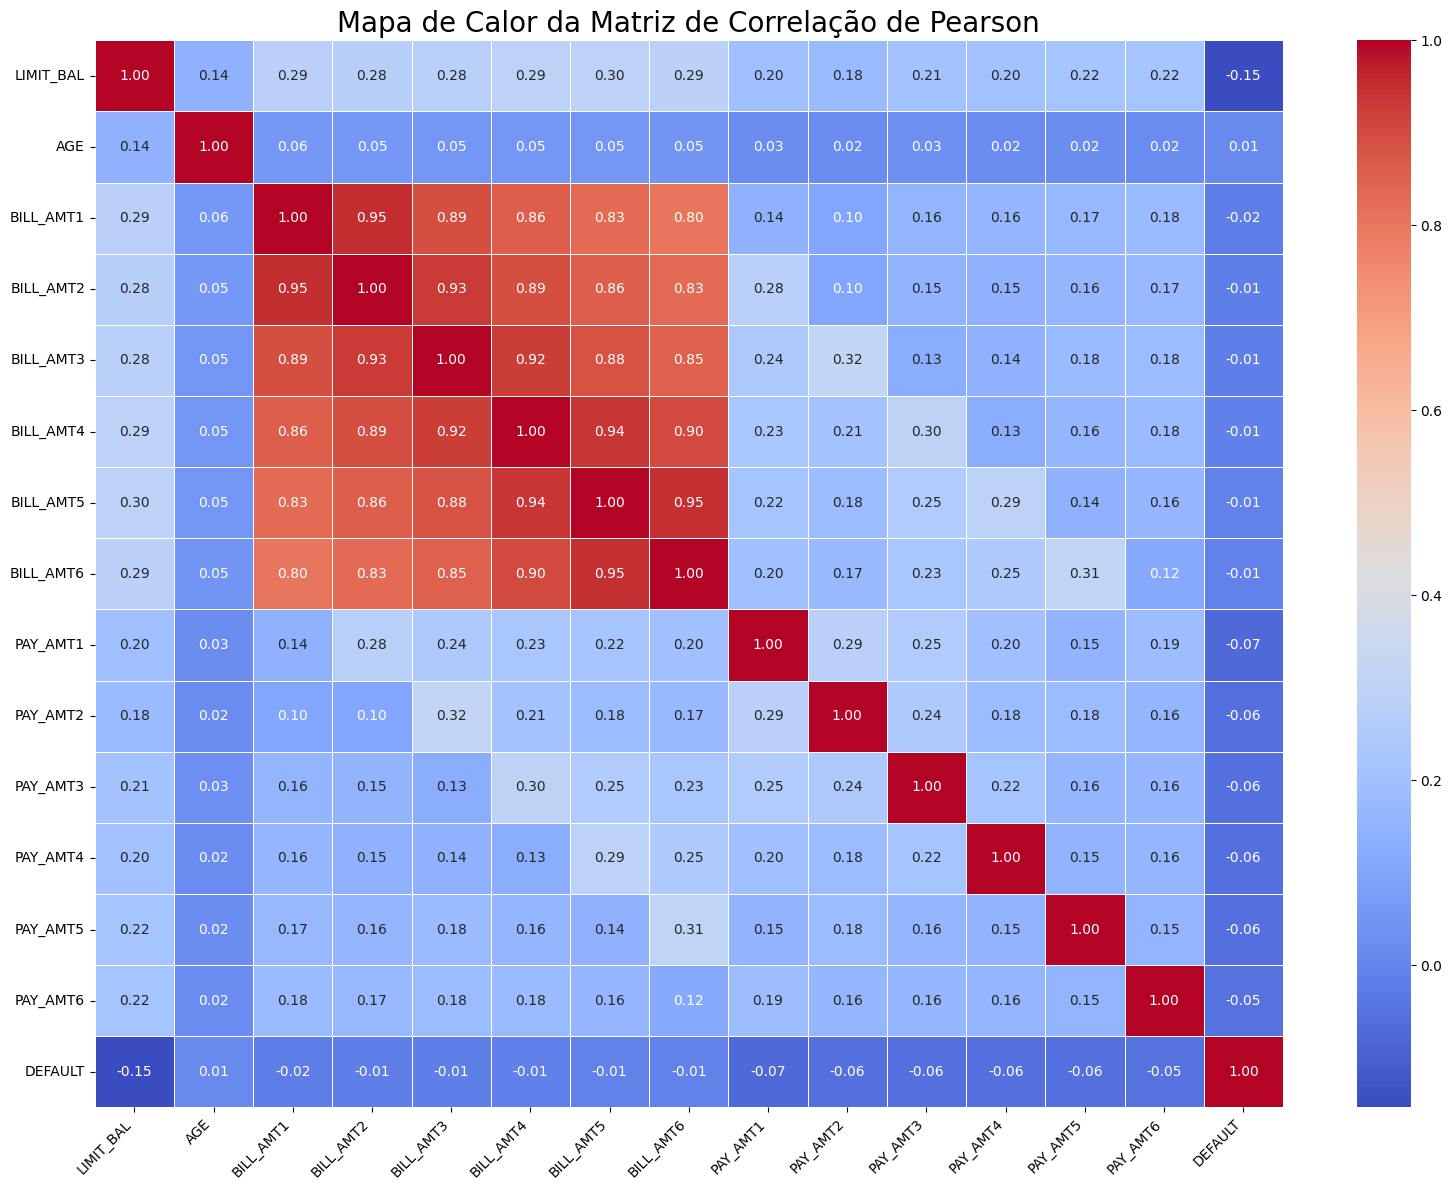

In [ ]:
# Preferível um mapa de calor (heatmap) para visualizar a matriz de correlação
plt.figure(figsize=(16, 12)) # Definir o tamanho da figura para melhor visualização
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# 'annot=True' exibe os valores de correlação no mapa de calor
# 'cmap' define o esquema de cores (coolwarm é bom para correlações positivas e negativas)
# 'fmt=".2f"' formata os números com duas casas decimais
# 'linewidths=.5' adiciona linhas entre as células para melhor distinção

plt.title('Mapa de Calor da Matriz de Correlação de Pearson', fontsize=20)
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo X para melhor legibilidade
plt.yticks(rotation=0) # Manter os rótulos do eixo Y na horizontal
plt.tight_layout() # Ajustar o layout para evitar sobreposição de elementos
plt.show()

###“Embora algumas variáveis apresentem correlação com inadimplência, correlação não implica causalidade.”

In [ ]:
# Exibir apenas a correlação de todas as variáveis numéricas com a variável 'DEFAULT',
# ordenando os resultados para identificar as associações mais fortes.
print("\nCorrelação das variáveis com 'DEFAULT' (Inadimplência) - Ordenado por força:")
default_correlations = correlation_matrix['DEFAULT'].sort_values(ascending=False)
display(default_correlations)


Correlação das variáveis com 'DEFAULT' (Inadimplência) - Ordenado por força:


,DEFAULT
DEFAULT,1.000000
AGE,0.013890
BILL_AMT6,-0.005372
BILL_AMT5,-0.006760
BILL_AMT4,-0.010156
BILL_AMT3,-0.014076
BILL_AMT2,-0.014193
BILL_AMT1,-0.019644
PAY_AMT6,-0.053183
PAY_AMT5,-0.055124


## Comparação da Renda Média por Inadimplência


Agrupar o DataFrame pela coluna 'DEFAULT' (inadimplência) e calcular a média da 'LIMIT_BAL' (limite de crédito) para clientes inadimplentes e não inadimplentes.


Média do Limite de Crédito por Status de Inadimplência:


,LIMIT_BAL
DEFAULT,
0,178099.726074
1,130109.65642


/tmp/ipython-input-1151455222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_limit_by_default.index, y=avg_limit_by_default.values, palette='viridis')


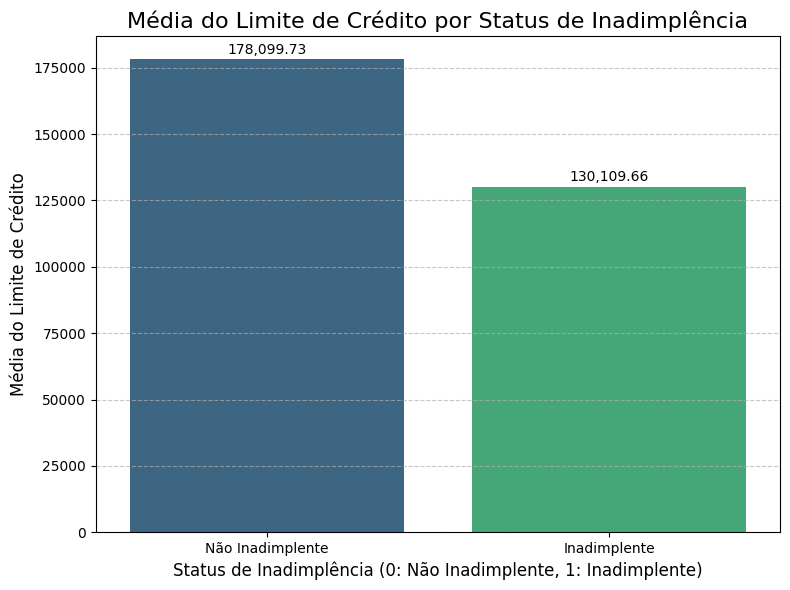

In [ ]:
# Agrupar o DataFrame df pela coluna 'DEFAULT' e calcular a média da coluna 'LIMIT_BAL'
avg_limit_by_default = df.groupby('DEFAULT')['LIMIT_BAL'].mean()

# Imprimir o resultado
print("Média do Limite de Crédito por Status de Inadimplência:")
display(avg_limit_by_default)

# Criar um gráfico de barras para visualizar essa comparação
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_limit_by_default.index, y=avg_limit_by_default.values, palette='viridis')

# Adicionar um título ao gráfico, rótulos aos eixos X e Y
plt.title('Média do Limite de Crédito por Status de Inadimplência', fontsize=16)
plt.xlabel('Status de Inadimplência (0: Não Inadimplente, 1: Inadimplente)', fontsize=12)
plt.ylabel('Média do Limite de Crédito', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Inadimplente', 'Inadimplente'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores acima das barras
for index, value in enumerate(avg_limit_by_default.values):
    plt.text(index, value + 1000, f'{value:,.2f}', ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Comparação da Dispersão de Idade por Inadimplência

Agrupar o DataFrame pela coluna 'DEFAULT' e calcular estatísticas de dispersão, como o desvio padrão e o Intervalo Interquartil (IQR), para a coluna 'AGE' (idade) em cada grupo. Um box plot pode ser gerado para visualizar essa dispersão.

Estatísticas de Dispersão da Idade por Status de Inadimplência:


,Standard Deviation,Q1,Q3,IQR
DEFAULT,,,,
0,9.077355,28,41,13
1,9.693438,28,42,14


/tmp/ipython-input-2936087294.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEFAULT', y='AGE', data=df, palette='pastel')


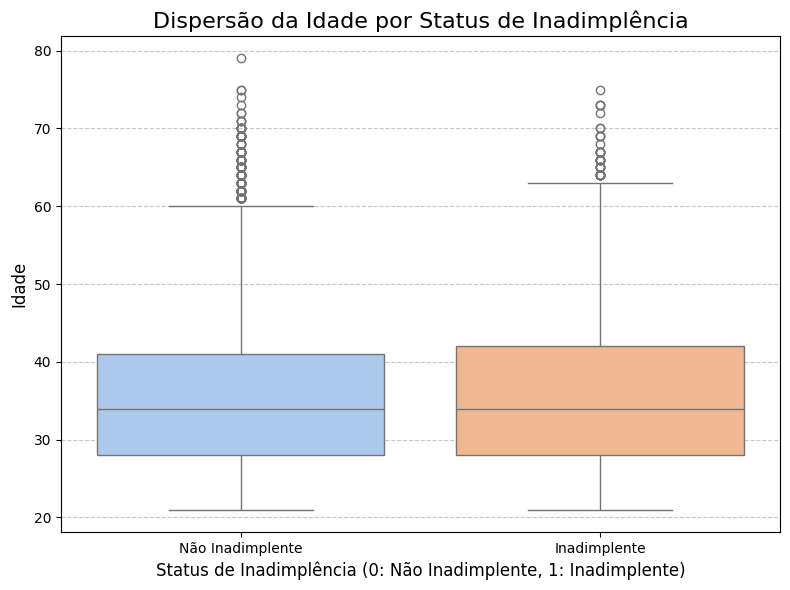

In [ ]:
# Agrupar o DataFrame df pela coluna 'DEFAULT'
# Para cada grupo, calcule o desvio padrão, Q1, Q3 e IQR da coluna 'AGE'
dispersion_stats_age = df.groupby('DEFAULT')['AGE'].agg([
    'std',
    lambda x: x.quantile(0.25), # Q1
    lambda x: x.quantile(0.75)  # Q3
])

dispersion_stats_age.columns = ['Standard Deviation', 'Q1', 'Q3']
dispersion_stats_age['IQR'] = dispersion_stats_age['Q3'] - dispersion_stats_age['Q1']

# Imprimir as estatísticas de dispersão calculadas para 'AGE'
print("Estatísticas de Dispersão da Idade por Status de Inadimplência:")
display(dispersion_stats_age)

# Criar um box plot para visualizar a distribuição de 'AGE' para cada valor da coluna 'DEFAULT'
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEFAULT', y='AGE', data=df, palette='pastel')

# Adicionar um título ao gráfico, rótulos aos eixos X e Y
plt.title('Dispersão da Idade por Status de Inadimplência', fontsize=16)
plt.xlabel('Status de Inadimplência (0: Não Inadimplente, 1: Inadimplente)', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Inadimplente', 'Inadimplente'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Perguntas & Respostas
- **Clientes inadimplentes possuem um limite de crédito médio menor?**  
  Sim. Clientes que entraram em inadimplência apresentam um limite de crédito médio menor (US 130.109,66) em comparação com clientes que não entraram em inadimplência (US 178.099,73).

- **A dispersão da idade é diferente entre clientes inadimplentes e não inadimplentes?**  
  Não. A dispersão da idade, medida pelo desvio padrão e pelo Intervalo Interquartil (IQR), é muito semelhante entre os dois grupos.  
  - Clientes não inadimplentes: desvio padrão ≈ 9,08 e IQR = 13  
  - Clientes inadimplentes: desvio padrão ≈ 9,69 e IQR = 14  

### Principais Resultados da Análise de Dados
- **Visão Geral das Estatísticas Descritivas**  
  Foram calculadas estatísticas descritivas completas para todas as colunas numéricas, incluindo média, mediana, moda, desvio padrão, variância, quartis e IQR.  
  Muitas colunas `BILL_AMT` e `PAY_AMT` apresentaram valor **0** como moda, indicando um grande número de transações ou pagamentos zerados.  
  Os valores mínimos negativos nas colunas `BILL_AMT` sugerem possíveis ajustes de crédito ou estornos.

- **Correlação com Inadimplência (`DEFAULT`)**
  - `LIMIT_BAL` apresentou a correlação linear negativa mais forte com `DEFAULT` entre as variáveis preditoras, com valor de **-0,153520**, indicando que limites de crédito mais altos estão fracamente associados a menor probabilidade de inadimplência.
  - As colunas `PAY_AMT` mostraram correlações negativas fracas com `DEFAULT` (por exemplo, `PAY_AMT1` com **-0,072929**).
  - As colunas `BILL_AMT` apresentaram correlações negativas muito fracas (por exemplo, `BILL_AMT1` com **-0,019644**).
  - `AGE` teve uma correlação positiva muito fraca com `DEFAULT`, no valor de **0,013890**.

- **Limite de Crédito Médio por Status de Inadimplência**  
  Clientes não inadimplentes (`DEFAULT = 0`) apresentaram um limite de crédito médio significativamente maior (US 178.099,73), enquanto clientes inadimplentes (`DEFAULT = 1`) tiveram um limite médio de US 130.109,66.

- **Dispersão da Idade por Status de Inadimplência**  
  A distribuição e as métricas de dispersão da idade (desvio padrão e IQR) foram muito semelhantes entre os dois grupos, sugerindo que a dispersão etária não é um fator fortemente discriminante para inadimplência.

# ETAPA 2 — Probabilidade

Objetivo: quantificar risco.

* Probabilidade marginal:

  * P(Inadimplência)

* Probabilidade condicional:

  * P(Inadimplência | renda < X)

* Regra do produto

* Regra de Bayes (conceitual + prática)

Perguntas que você deve responder;

Qual a probabilidade de um cliente ser inadimplente dado que tem mais de 2 atrasos?


## Probabilidade Marginal de Inadimplência


Calcular a probabilidade marginal de um cliente ser inadimplente (P(DEFAULT=1)). Isso envolve simplesmente contar o número de casos de inadimplência e dividir pelo total de clientes.


In [ ]:
# Obter a contagem de clientes inadimplentes e não inadimplentes
default_counts = df['DEFAULT'].value_counts()

# Contar o número de clientes inadimplentes (DEFAULT = 1)
num_default_clients = default_counts.get(1, 0)

# Calcular o número total de clientes
total_clients = len(df)

# Calcular a probabilidad marginal de inadimplência
prob_default = num_default_clients / total_clients

# Imprimir a probabilidade marginal de inadimplência
print(f"Probabilidade Marginal de Inadimplência (P(DEFAULT=1)): {prob_default:.2%}")

Probabilidade Marginal de Inadimplência (P(DEFAULT=1)): 22.12%


## Probabilidade Condicional

Calcular a probabilidade condicional de um cliente ser inadimplente dado que tem **mais de 2 atrasos**.

Para isso, precisamos definir o que significa "mais de 2 atrasos". As colunas `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6` indicam o status de pagamento para cada mês. Um valor `PAY_X > 2` pode ser interpretado como um atraso de 2 meses ou mais.

### Instruções:
1. Crie uma nova coluna booleana no DataFrame `df` que indique se o cliente teve "mais de 2 atrasos" em **qualquer um** dos meses (`PAY_0` a `PAY_6`). Uma forma de fazer isso é verificar se `(df['PAY_0'] > 2) | (df['PAY_2'] > 2) | ... | (df['PAY_6'] > 2)`. Chame esta nova coluna de `MORE_THAN_2_DELAYS`.
2. Calcule o número de clientes que tiveram "mais de 2 atrasos" (N(MORE_THAN_2_DELAYS)).
3. Calcule o número de clientes que são inadimplentes E tiveram "mais de 2 atrasos" (N(DEFAULT=1 AND MORE_THAN_2_DELAYS)).
4. Calcule a probabilidade condicional P(DEFAULT=1 | MORE_THAN_2_DELAYS) = N(DEFAULT=1 AND MORE_THAN_2_DELAYS) / N(MORE_THAN_2_DELAYS).
5. Imprima a probabilidade condicional formatada como porcentagem.

In [ ]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Crie uma nova coluna booleana 'MORE_THAN_2_DELAYS'
# Um cliente teve mais de 2 atrasos se qualquer uma das colunas PAY_X for > 2
df['MORE_THAN_2_DELAYS'] = (df[pay_cols] > 2).any(axis=1)

# Calcule o número de clientes que tiveram "mais de 2 atrasos"
num_more_than_2_delays = df['MORE_THAN_2_DELAYS'].sum()

# Calcule o número de clientes que são inadimplentes E tiveram "mais de 2 atrasos"
num_default_and_delays = df[(df['DEFAULT'] == 1) & (df['MORE_THAN_2_DELAYS'])].shape[0]

# Calcule a probabilidade condicional P(DEFAULT=1 | MORE_THAN_2_DELAYS)
if num_more_than_2_delays > 0:
    prob_default_given_delays = num_default_and_delays / num_more_than_2_delays
else:
    prob_default_given_delays = 0.0 # Caso não haja clientes com mais de 2 atrasos

# Imprima a probabilidade condicional
print(f"Probabilidade de inadimplência dado mais de 2 atrasos (P(DEFAULT=1 | MORE_THAN_2_DELAYS)): {prob_default_given_delays:.2%}")


Probabilidade de inadimplência dado mais de 2 atrasos (P(DEFAULT=1 | MORE_THAN_2_DELAYS)): 62.87%


## Regra do Produto

Calcular a probabilidade conjunta de um cliente ser inadimplente E ter mais de 2 atrasos (P(DEFAULT=1 AND MORE_THAN_2_DELAYS)), utilizando a Regra do Produto e compará-la com a probabilidade conjunta calculada diretamente.

A Regra do Produto estabelece que P(A e B) = P(A | B) * P(B).

### Instruções:
1. Calcule a probabilidade marginal de um cliente ter "mais de 2 atrasos" (P(MORE_THAN_2_DELAYS)). Você já tem o número total de clientes e o número de clientes com mais de 2 atrasos do passo anterior.
2. Utilize a Regra do Produto para calcular P(DEFAULT=1 AND MORE_THAN_2_DELAYS) = P(DEFAULT=1 | MORE_THAN_2_DELAYS) * P(MORE_THAN_2_DELAYS). Use o valor de `prob_default_given_delays` calculado anteriormente.
3. Calcule a probabilidade conjunta P(DEFAULT=1 AND MORE_THAN_2_DELAYS) diretamente, dividindo o `num_default_and_delays` pelo `total_clients` (ambos calculados anteriormente).
4. Imprima ambos os resultados e compare-os para verificar a consistência. Formate os resultados como porcentagens.

In [ ]:
# Calcule a probabilidade marginal de um cleente ter "mais de 2 atrasos" (P(MORE_THAN_2_DELAYS))
# num_more_than_2_delays e total_clients já foram calculados nos passos anteriores.
prob_more_than_2_delays = num_more_than_2_delays / total_clients

# Utilize a Regra do Produto para calcular P(DEFAULT=1 AND MORE_THAN_2_DELAYS)
# prob_default_given_delays já foi calculada.
prob_joint_product_rule = prob_default_given_delays * prob_more_than_2_delays

# Calcule a probabilidade conjunta P(DEFAULT=1 AND MORE_THAN_2_DELAYS) diretamente
# Num_default_and_delays e total_clients já foram calculados.
prob_joint_direct = num_default_and_delays / total_clients

# 4. Imprima ambos os resultados e compare-os
print(f"Probabilidade Conjunta (P(DEFAULT=1 AND MORE_THAN_2_DELAYS)) pela Regra do Produto: {prob_joint_product_rule:.2%}")
print(f"Probabilidade Conjunta (P(DEFAULT=1 AND MORE_THAN_2_DELAYS)) calculada diretamente: {prob_joint_direct:.2%}")

# Verificação de consistência
if np.isclose(prob_joint_product_rule, prob_joint_direct):
    print("Os resultados são consistentes, confirmando a Regra do Produto.")
else:
    print("Os resultados não são consistentes.")

Probabilidade Conjunta (P(DEFAULT=1 AND MORE_THAN_2_DELAYS)) pela Regra do Produto: 2.50%
Probabilidade Conjunta (P(DEFAULT=1 AND MORE_THAN_2_DELAYS)) calculada diretamente: 2.50%
Os resultados são consistentes, confirmando a Regra do Produto.


## Regra de Bayes

Calcular a probabilidade de um cliente ter mais de 2 atrasos *dado que* ele é inadimplente (P(MORE_THAN_2_DELAYS | DEFAULT=1)), utilizando a Regra de Bayes. Comparar este resultado com a probabilidade condicional inversa (P(DEFAULT=1 | MORE_THAN_2_DELAYS)).

A Regra de Bayes estabelece que: P(A|B) = [P(B|A) * P(A)] / P(B)

Neste caso, queremos calcular P(MORE_THAN_2_DELAYS | DEFAULT=1):

P(MORE_THAN_2_DELAYS | DEFAULT=1) = [P(DEFAULT=1 | MORE_THAN_2_DELAYS) * P(MORE_THAN_2_DELAYS)] / P(DEFAULT=1)

### Instruções:
1. Relembre os valores já calculados:
   - `prob_default_given_delays` (P(DEFAULT=1 | MORE_THAN_2_DELAYS))
   - `prob_more_than_2_delays` (P(MORE_THAN_2_DELAYS))
   - `prob_default` (P(DEFAULT=1))
2. Aplique a fórmula da Regra de Bayes para calcular P(MORE_THAN_2_DELAYS | DEFAULT=1).
3. Imprima o resultado da probabilidade condicional inversa P(MORE_THAN_2_DELAYS | DEFAULT=1), formatando-o como porcentagem.
4. Comente sobre a relação entre esta probabilidade e a `prob_default_given_delays` (P(DEFAULT=1 | MORE_THAN_2_DELAYS)).

In [ ]:
# Relembre os valores já calculados:
# prob_default_given_delays (P(DEFAULT=1 | MORE_THAN_2_DELAYS))
# prob_more_than_2_delays (P(MORE_THAN_2_DELAYS))
# prob_default (P(DEFAULT=1))

# Aplique a fórmula da Regra de Bayes para calcular P(MORE_THAN_2_DELAYS | DEFAULT=1)
# P(A|B) = [P(B|A) * P(A)] / P(B)
# A = MORE_THAN_2_DELAYS, B = DEFAULT=1
# P(MORE_THAN_2_DELAYS | DEFAULT=1) = [P(DEFAULT=1 | MORE_THAN_2_DELAYS) * P(MORE_THAN_2_DELAYS)] / P(DEFAULT=1)

# Verifique se prob_default não é zero para evitar divisão por zero.
if prob_default > 0:
    prob_delays_given_default = (prob_default_given_delays * prob_more_than_2_delays) / prob_default
else:
    prob_delays_given_default = 0.0 # Caso P(DEFAULT=1) seja zero, a probabilidade condicional é zero

# 3. Imprima o resultado da probabilidade condicional inversa P(MORE_THAN_2_DELAYS | DEFAULT=1)
print(f"Probabilidade de mais de 2 atrasos dado inadimplência (P(MORE_THAN_2_DELAYS | DEFAULT=1)): {prob_delays_given_default:.2%}")

# 4. Comente sobre a relação entre esta probabilidade e a prob_default_given_delays
print(f"\nComparação: ")
print(f"P(DEFAULT=1 | MORE_THAN_2_DELAYS) = {prob_default_given_delays:.2%}")
print(f"P(MORE_THAN_2_DELAYS | DEFAULT=1) = {prob_delays_given_default:.2%}")

Probabilidade de mais de 2 atrasos dado inadimplência (P(MORE_THAN_2_DELAYS | DEFAULT=1)): 11.30%

Comparação: 
P(DEFAULT=1 | MORE_THAN_2_DELAYS) = 62.87%
P(MORE_THAN_2_DELAYS | DEFAULT=1) = 11.30%


## Probabilidade Condicional P(DEFAULT=1 | LIMIT_BAL < X)

Definir um limiar 'X' para o limite de crédito (LIMIT_BAL) —
 utilizando o primeiro quartil — e calcular a probabilidade de um cliente ser inadimplente dado que seu limite de crédito é inferior a esse valor.


In [ ]:
# Calcule o primeiro quartil (Q1) da coluna 'LIMIT_BAL'
limit_bal_threshold = df['LIMIT_BAL'].quantile(0.25)
print(f"Primeiro Quartil (Q1) de LIMIT_BAL: {limit_bal_threshold:,.2f}")

# Crie uma nova coluna booleana 'LOW_LIMIT_BAL'
df['LOW_LIMIT_BAL'] = (df['LIMIT_BAL'] <= limit_bal_threshold)

# Calcule o número total de clientes que possuem um limite de crédito baixo
num_low_limit_bal = df['LOW_LIMIT_BAL'].sum()

# Calcule o número de clientes que são inadimplentes (DEFAULT = 1) E que possuem um limite de crédito baixo
num_default_and_low_limit = df[(df['DEFAULT'] == 1) & (df['LOW_LIMIT_BAL'])].shape[0]

# Calcule a probabilidade condicional P(DEFAULT=1 | LOW_LIMIT_BAL)
if num_low_limit_bal > 0:
    prob_default_given_low_limit_bal = num_default_and_low_limit / num_low_limit_bal
else:
    prob_default_given_low_limit_bal = 0.0 # Evitar divisão por zero

# Imprima a probabilidade condicional
print(f"Probabilidade de inadimplência dado um limite de crédito baixo (P(DEFAULT=1 | LOW_LIMIT_BAL)): {prob_default_given_low_limit_bal:.2%}")

Primeiro Quartil (Q1) de LIMIT_BAL: 50,000.00
Probabilidade de inadimplência dado um limite de crédito baixo (P(DEFAULT=1 | LOW_LIMIT_BAL)): 31.79%


## Demonstração da Regra do Produto

Utilizar as probabilidades calculadas anteriormente para demonstrar a Regra do Produto, ou seja, P(A e B) = P(A|B) * P(B). Isso será feito calculando a probabilidade conjunta de inadimplência e limite de crédito baixo.


In [ ]:
# Calcule a probabilidade marginal de um cliente ter um limite de crédito baixo (P(LOW_LIMIT_BAL))
# num_low_limit_bal e total_clients já foram calculados nos passos anteriores.
prob_low_limit_bal = num_low_limit_bal / total_clients

# Utilize a Regra do Produto para calcular P(DEFAULT=1 AND LOW_LIMIT_BAL)
# prob_default_given_low_limit_bal já foi calculada.
prob_joint_product_rule_low_limit = prob_default_given_low_limit_bal * prob_low_limit_bal

# Calcule a probabilidade conjunta P(DEFAULT=1 AND LOW_LIMIT_BAL) diretamente
# num_default_and_low_limit e total_clients já foram calculados.
prob_joint_direct_low_limit = num_default_and_low_limit / total_clients

# Imprima ambos os resultados e compare-os
print(f"Probabilidade Conjunta (P(DEFAULT=1 AND LOW_LIMIT_BAL)) pela Regra do Produto: {prob_joint_product_rule_low_limit:.2%}")
print(f"Probabilidade Conjunta (P(DEFAULT=1 AND LOW_LIMIT_BAL)) calculada diretamente: {prob_joint_direct_low_limit:.2%}")

# Verificação de consistência
if np.isclose(prob_joint_product_rule_low_limit, prob_joint_direct_low_limit):
    print("Os resultados são consistentes, confirmando a Regra do Produto para inadimplência e limite de crédito baixo.")
else:
    print("Os resultados não são consistentes.")

Probabilidade Conjunta (P(DEFAULT=1 AND LOW_LIMIT_BAL)) pela Regra do Produto: 8.13%
Probabilidade Conjunta (P(DEFAULT=1 AND LOW_LIMIT_BAL)) calculada diretamente: 8.13%
Os resultados são consistentes, confirmando a Regra do Produto para inadimplência e limite de crédito baixo.


## Demonstração da Regra de Bayes

Aplicar a Regra de Bayes para calcular uma probabilidade inversa, como P(LIMIT_BAL < X | DEFAULT=1), mostrando como as probabilidades podem ser atualizadas com novas evidências.


In [ ]:
# Relembre os valores já calculados:
# prob_default_given_low_limit_bal (P(DEFAULT=1 | LOW_LIMIT_BAL))
# prob_low_limit_bal (P(LOW_LIMIT_BAL))
# prob_default (P(DEFAULT=1))

# Aplique a fórmula da Regra de Bayes para calcular P(LOW_LIMIT_BAL | DEFAULT=1)
# P(A|B) = [P(B|A) * P(A)] / P(B)
# A = LOW_LIMIT_BAL, B = DEFAULT=1
# P(LOW_LIMIT_BAL | DEFAULT=1) = [P(DEFAULT=1 | LOW_LIMIT_BAL) * P(LOW_LIMIT_BAL)] / P(DEFAULT=1)

# Verifique se prob_default não é zero para evitar divisão por zero.
if prob_default > 0:
    prob_low_limit_given_default = (prob_default_given_low_limit_bal * prob_low_limit_bal) / prob_default
else:
    prob_low_limit_given_default = 0.0 # Caso P(DEFAULT=1) seja zero, a probabilidade condicional é zero

# 3. Imprima o resultado da probabilidade condicional inversa P(LOW_LIMIT_BAL | DEFAULT=1)
print(f"Probabilidade de ter limite de crédito baixo dado inadimplência (P(LOW_LIMIT_BAL | DEFAULT=1)): {prob_low_limit_given_default:.2%}")

# 4. Comente sobre a relação entre esta probabilidade e as probabilidades marginais e condicionais anteriores
print(f"\nComparação:\n")
print(f"Probabilidade Marginal de Inadimplência (P(DEFAULT=1)): {prob_default:.2%}")
print(f"Probabilidade Marginal de Limite de Crédito Baixo (P(LOW_LIMIT_BAL)): {prob_low_limit_bal:.2%}")
print(f"Probabilidade de Inadimplência dado Limite de Crédito Baixo (P(DEFAULT=1 | LOW_LIMIT_BAL)): {prob_default_given_low_limit_bal:.2%}")
print(f"Probabilidade de Limite de Crédito Baixo dado Inadimplência (P(LOW_LIMIT_BAL | DEFAULT=1)): {prob_low_limit_given_default:.2%}")


Probabilidade de ter limite de crédito baixo dado inadimplência (P(LOW_LIMIT_BAL | DEFAULT=1)): 36.77%

Comparação:

Probabilidade Marginal de Inadimplência (P(DEFAULT=1)): 22.12%
Probabilidade Marginal de Limite de Crédito Baixo (P(LOW_LIMIT_BAL)): 25.59%
Probabilidade de Inadimplência dado Limite de Crédito Baixo (P(DEFAULT=1 | LOW_LIMIT_BAL)): 31.79%
Probabilidade de Limite de Crédito Baixo dado Inadimplência (P(LOW_LIMIT_BAL | DEFAULT=1)): 36.77%


### Perguntas & Respostas
- A probabilidade de um cliente entrar em inadimplência dado que ele possui **mais de dois atrasos de pagamento**
  (P(DEFAULT = 1 | MORE_THAN_2_DELAYS)) foi calculada em **62,87%**.



### Principais Resultados da Análise de Dados

- A **probabilidade marginal** de um cliente entrar em inadimplência  
  (P(DEFAULT = 1)) é **22,12%**.

- A **probabilidade condicional** de inadimplência dado que o cliente possui mais de dois atrasos de pagamento  
  (P(DEFAULT = 1 | MORE_THAN_2_DELAYS)) é **62,87%**.

- A **probabilidade conjunta** de um cliente ser inadimplente **e** possuir mais de dois atrasos de pagamento  
  (P(DEFAULT = 1 AND MORE_THAN_2_DELAYS)) é **2,50%**, valor obtido de forma consistente tanto pela **Regra do Produto** quanto pela enumeração direta.

- A **probabilidade condicional inversa** de um cliente possuir mais de dois atrasos de pagamento dado que ele é inadimplente  
  (P(MORE_THAN_2_DELAYS | DEFAULT = 1)) é **11,30%**.

- O **primeiro quartil (Q1)** do limite de crédito (`LIMIT_BAL`) é **US$ 50.000**.

- A **probabilidade condicional** de inadimplência dado que o cliente possui um **limite de crédito baixo**
  (definido como `LIMIT_BAL ≤ US$ 50.000`)  
  (P(DEFAULT = 1 | LOW_LIMIT_BAL)) é **31,79%**.

- A **probabilidade conjunta** de um cliente ser inadimplente **e** possuir um limite de crédito baixo  
  (P(DEFAULT = 1 AND LOW_LIMIT_BAL)) é **8,13%**, também calculada de forma consistente pela **Regra do Produto** e pela enumeração direta.

- A **probabilidade condicional inversa** de um cliente possuir um limite de crédito baixo dado que ele é inadimplente  
  (P(LOW_LIMIT_BAL | DEFAULT = 1)) é **36,77%**, valor superior à **probabilidade marginal** de possuir um limite de crédito baixo (**25,59%**).



#ETAPA 3 — Distribuições Estatísticas

Objetivo: modelar o comportamento das variáveis.

* Ajustar:

  * Normal → renda, idade

  * Binomial → inadimplência (0/1)

  * Poisson → número de atrasos

* Visualizar PDFs e PMFs

* Verificar aderência (histograma + curva)

Perguntas que você deve responder;

A renda segue distribuição normal?

O número de atrasos segue Poisson?

## Análise da Distribuição Normal para Renda (LIMIT_BAL) e Idade (AGE)


Para as variáveis 'LIMIT_BAL' (limite de crédito) e 'AGE' (idade), calcular a média e o desvio padrão. Em seguida, plotar um histograma dos dados observados e sobrepor a curva da Função de Densidade de Probabilidade (PDF) de uma distribuição normal teórica, utilizando os parâmetros calculados.



Análise para a coluna: LIMIT_BAL

Média: 167484.32

Desvio Padrão: 129747.66


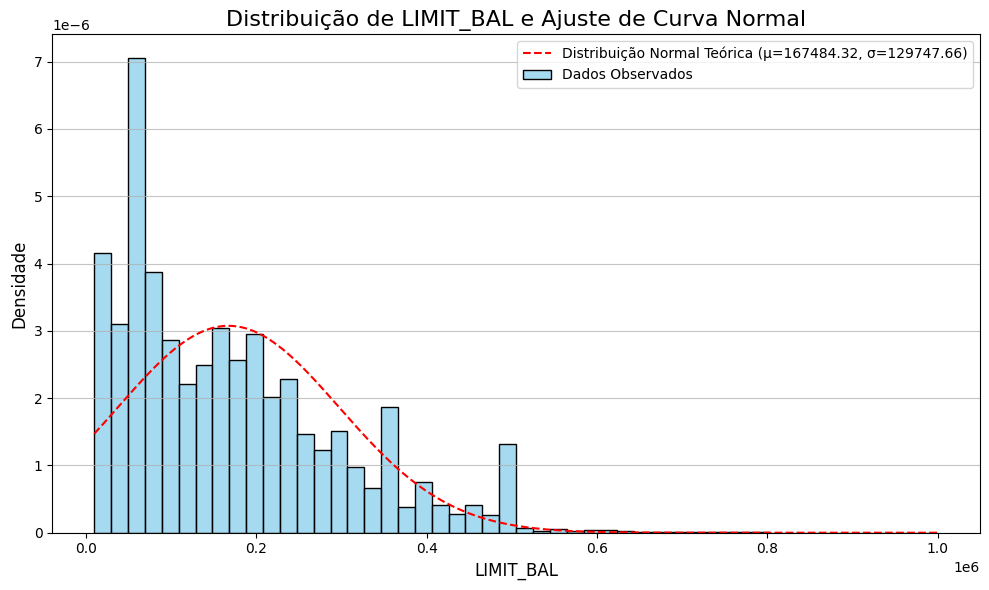


Análise para a coluna: AGE

Média: 35.49

Desvio Padrão: 9.22


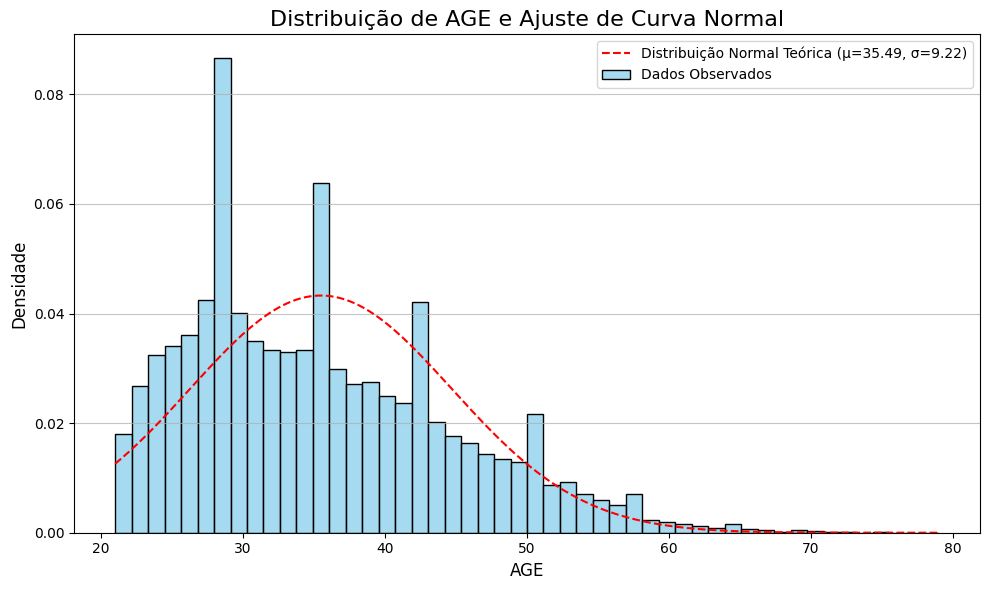

In [ ]:
# Crie uma lista com os nomes das colunas a serem analisadas
columns_to_analyze = ['LIMIT_BAL', 'AGE']

# Para cada coluna na lista:
for col in columns_to_analyze:
    # Calcule a média (mean_val) e o desvio padrão (std_val) da coluna
    mean_val = df[col].mean()
    std_val = df[col].std()

    # Imprima a média e o desvio padrão calculados
    print(f"\nAnálise para a coluna: {col}")
    print(f"\nMédia: {mean_val:.2f}")
    print(f"\nDesvio Padrão: {std_val:.2f}")

    # Crie uma figura e um eixo para o plot
    plt.figure(figsize=(10, 6))

    # Plote um histograma da coluna
    sns.histplot(df[col], kde=False, stat='density', bins=50, color='skyblue', label='Dados Observados')

    # Crie um array de valores x para plotar a PDF teórica
    x = np.linspace(df[col].min(), df[col].max(), 1000)

    # Calcule os valores da Função de Densidade de Probabilidade (PDF)
    pdf_values = norm.pdf(x, loc=mean_val, scale=std_val)

    # Plote a curva da PDF teórica sobre o histograma
    plt.plot(x, pdf_values, color='red', linestyle='--', label=f'Distribuição Normal Teórica (μ={mean_val:.2f}, σ={std_val:.2f})')

    # Adicione um título ao gráfico
    plt.title(f'Distribuição de {col} e Ajuste de Curva Normal', fontsize=16)

    # Adicione rótulos aos eixos X e Y
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidade', fontsize=12)

    # Adicione uma legenda ao gráfico
    plt.legend()

    # Exiba o gráfico
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


    Análise da Distribuição Binomial para DEFAULT    
Probabilidade de Inadimplência (p): 0.2212


/tmp/ipython-input-3514600350.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')


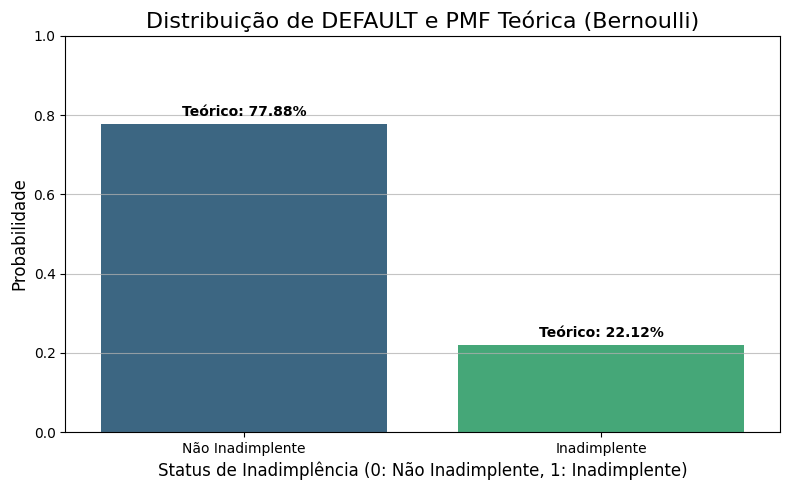

In [ ]:
# Análise da Distribuição Binomial para DEFAULT
print("\n    Análise da Distribuição Binomial para DEFAULT    ")

# Calcule a probabilidade de inadimplência (p) e o número de tentativas (n)
# Para uma variável Bernoulli (um único teste, 0 ou 1), a "probabilidade de sucesso" p
# é simplesmente a média da variável.
# O "número de tentativas" n para a distribuição binomial em um único evento é 1.
# Se considerarmos 'n' clientes, e a probabilidade de inadimplência 'p', a distribuição
# Binomial(n, p) descreveria o número de inadimplentes em 'n' clientes.
# No entanto, aqui, estamos modelando a probabilidade de um *único* cliente ser inadimplente.
# Então, calculamos 'p' e visualizamos a PMF de Bernoulli (que é um caso especial da binomial com n=1).

# Probabilidade de sucesso (DEFAULT=1)
p_default = df['DEFAULT'].mean()

# Imprimir o parâmetro 'p'
print(f"Probabilidade de Inadimplência (p): {p_default:.4f}")

# 2. Plote um gráfico de barras das frequências observadas
default_counts = df['DEFAULT'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')

# Calcule os valores da PMF teórica para uma distribuição Bernoulli (Binomial com n=1)
x_binom = [0, 1]
pmf_binom = [binom.pmf(k, 1, p_default) for k in x_binom]

# Adicionar os valores da PMF teórica como texto no gráfico
for i, prob in enumerate(pmf_binom):
    plt.text(i, prob + 0.02, f'Teórico: {prob:.2%}', ha='center', color='black', fontweight='bold')

plt.title('Distribuição de DEFAULT e PMF Teórica (Bernoulli)', fontsize=16)
plt.xlabel('Status de Inadimplência (0: Não Inadimplente, 1: Inadimplente)', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Inadimplente', 'Inadimplente'])
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()


    Análise da Distribuição de Poisson para o Número de Atrasos    
Média do Número Total de Atrasos (lambda): 0.8342


/tmp/ipython-input-1592684819.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='plasma')


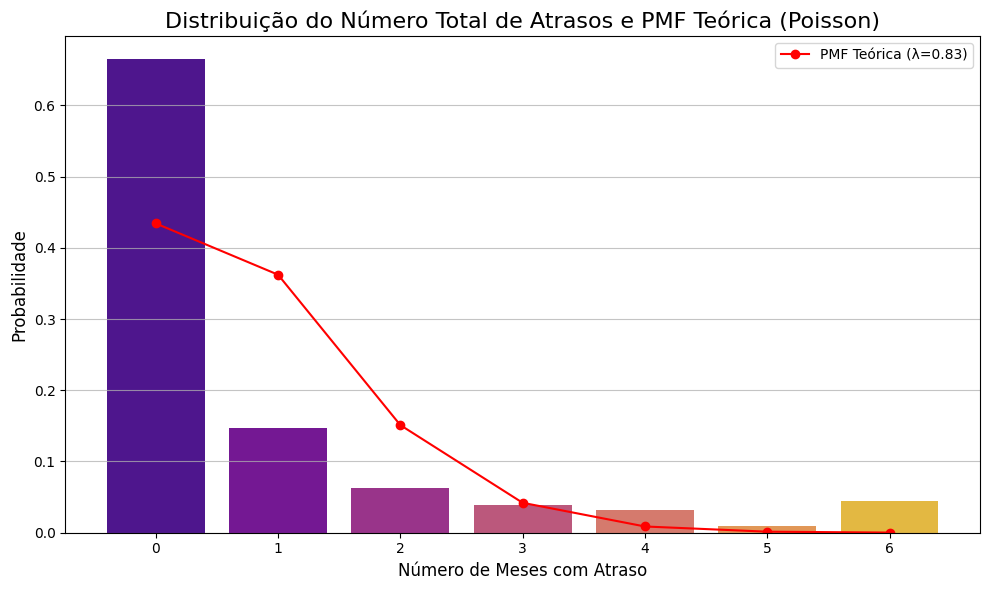

In [ ]:
#     Análise da Distribuição de Poisson para o Número de Atrasos
print("\n    Análise da Distribuição de Poisson para o Número de Atrasos    ")

# Crie a coluna 'TOTAL_DELAYS'
# Vamos definir 'atraso' como qualquer PAY_X > 0 (considerando -1 como pagamento em dia e 0 como NA/pago)
# E somar o número de meses em que houve atraso (PAY_X > 0)

pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# Contar quantos meses tiveram um status de atraso (>0)
df['TOTAL_DELAYS'] = df[pay_cols].apply(lambda x: (x > 0).sum(), axis=1)

# Calcule o parâmetro lambda (média) da distribuição de Poisson
lambda_poisson = df['TOTAL_DELAYS'].mean()

# Imprimir o parâmetro lambda
print(f"Média do Número Total de Atrasos (lambda): {lambda_poisson:.4f}")

# Plote um histograma/gráfico de barras das frequências observadas
# Frequências observadas do TOTAL_DELAYS
delay_counts = df['TOTAL_DELAYS'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='plasma')

# Crie um array de valores x para plotar a PMF teórica (até o máximo observado para melhor visualização)
x_poisson = np.arange(df['TOTAL_DELAYS'].max() + 1)
pmf_poisson = [poisson.pmf(k, lambda_poisson) for k in x_poisson]

# Plote a PMF teórica
plt.plot(x_poisson, pmf_poisson, 'o-', color='red', label=f'PMF Teórica (λ={lambda_poisson:.2f})')

plt.title('Distribuição do Número Total de Atrasos e PMF Teórica (Poisson)', fontsize=16)
plt.xlabel('Número de Meses com Atraso', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### Perguntas & Respostas (Q&A)

- **A renda segue distribuição normal?**  
  Não. A variável `LIMIT_BAL` (limite de crédito, utilizada como proxy para renda) não segue uma distribuição normal. Os dados apresentam assimetria à direita e múltiplos picos, indicando que a distribuição normal teórica não é um bom ajuste.

- **O número de atrasos segue uma distribuição de Poisson?**  
  A distribuição da variável `TOTAL_DELAYS` (número total de meses com atraso) apresenta um formato semelhante a uma distribuição de Poisson, especialmente para valores baixos. No entanto, existem discrepâncias relevantes, como uma frequência de zero atrasos maior do que a prevista pelo modelo de Poisson e uma quantidade maior de casos com seis atrasos do que o esperado. Isso indica que, embora haja similaridade, a aderência ao modelo não é perfeita.

### Principais Resultados da Análise de Distribuições

- **LIMIT_BAL (Limite de Crédito) e AGE (Idade) - Distribuição Normal**:
  - `LIMIT_BAL`:
    - A média do `LIMIT_BAL` é de aproximadamente 167.484,32 e o desvio padrão é de 129.747,66.
    - O histograma dos dados de `LIMIT_BAL` mostra uma distribuição com forte assimetria positiva (cauda longa à direita) e múltiplos picos, o que indica claramente que esta variável *não segue uma distribuição normal*.
    - A curva da PDF normal teórica sobreposta ao histograma diverge significativamente dos dados observados, confirmando a não aderência.
  - `AGE`:
    - A média da `AGE` é de aproximadamente 35,49 anos e o desvio padrão é de 9,22.
    - O histograma dos dados de `AGE` exibe uma distribuição que se aproxima mais de uma forma normal, com um pico central e caudas diminuindo. Contudo, ainda apresenta alguma leve assimetria e não é perfeitamente simétrica.
    - A curva da PDF normal teórica se alinha razoavelmente bem com os dados observados, sugerindo que a distribuição normal pode ser uma aproximação aceitável, mas não um ajuste perfeito.

- **DEFAULT (Inadimplência) - Distribuição Binomial (Bernoulli)**:
  - A variável `DEFAULT` é binária (0 ou 1) e, portanto, segue uma distribuição de Bernoulli, que é um caso especial da distribuição binomial com n=1.
  - A probabilidade de inadimplência (p) foi calculada em **0,2212** (22,12%), que é a média da variável `DEFAULT`.
  - O gráfico de barras dos dados observados corresponde exatamente à PMF teórica de uma distribuição de Bernoulli com p=0.2212, confirmando a aderência perfeita para uma variável binária.

- **TOTAL_DELAYS (Número Total de Atrasos) - Distribuição de Poisson**:
  - A variável `TOTAL_DELAYS` foi criada contando o número de meses em que o cliente teve status de atraso (`PAY_X > 0`).
  - O parâmetro lambda (média) da distribuição de Poisson para `TOTAL_DELAYS` foi calculado em aproximadamente **0,8342**.
  - O gráfico de barras das frequências observadas de `TOTAL_DELAYS` mostra que a maioria dos clientes não tem nenhum atraso (0 meses), seguido por um número decrescente de clientes com mais atrasos.
  - A curva da PMF teórica de Poisson com lambda = 0.8342 se sobrepõe razoavelmente bem aos dados observados, especialmente para 0 e 1 atraso. No entanto, há desvios, particularmente para 0 atrasos (observado > teórico) e para o grupo de 6 atrasos (observado > teórico). Isso indica que, embora a distribuição de Poisson seja uma boa primeira aproximação, pode haver superdispersão ou outros fatores não capturados que influenciam o número de atrasos.

Em resumo, enquanto a variável `DEFAULT` é perfeitamente modelada por uma distribuição de Bernoulli e `AGE` pode ser razoavelmente aproximada por uma Normal, `LIMIT_BAL` claramente não se ajusta a uma Normal. `TOTAL_DELAYS` apresenta características de Poisson, mas com algumas diferenças notáveis que podem ser exploradas em análises futuras para refinar a compreensão do risco.

#ETAPA 4 — Inferência Estatística

Objetivo: generalizar resultados para a população.

* Estimar média populacional

* Intervalos de confiança (95%)

* Inferência sobre proporção de inadimplentes

Perguntas que você deve responder;

Qual o intervalo de confiança da renda média dos inadimplentes?

"A inferência estatística é o conjunto de métodos que permite concluir sobre características de uma população (parâmetros) com base na análise de dados amostrais (estatísticas), utilizando o raciocínio indutivo para generalizar resultados. Ela quantifica a incerteza inerente à amostragem, sendo fundamental para pesquisas científicas e tomadas de decisão, dividindo-se principalmente em estimação de parâmetros e testes de hipóteses."

## Estimar a Renda Média dos Inadimplentes e seu Intervalo de Confiança (95%)


In [ ]:
# Filtre o DataFrame df para incluir apenas os clientes inadimplentes
df_inadimplentes = df[df['DEFAULT'] == 1].copy()

# Calcule a média, o desvio padrão e o número de observações da coluna 'LIMIT_BAL' para os clientes inadimplentes
mean_inadimplentes_limit_bal = df_inadimplentes['LIMIT_BAL'].mean()
std_inadimplentes_limit_bal = df_inadimplentes['LIMIT_BAL'].std()
n_inadimplentes = df_inadimplentes['LIMIT_BAL'].count()

# Calcule o erro padrão da média
se_inadimplentes_limit_bal = std_inadimplentes_limit_bal / (np.sqrt(n_inadimplentes))

# Determine o valor crítico de Z para um nível de confiança de 95%
# Para uma distribuição normal e 95% de confiança, o valor Z crítico é aproximadamente 1.96
z_critical = st.norm.ppf(0.975) # 0.975 para cobrir 95% no centro (2.5% em cada cauda)

# Calcule a margem de erro para a renda média
margin_of_error_limit_bal = z_critical * se_inadimplentes_limit_bal

# Calcule o intervalo de confiança inferior e superior para a renda média dos clientes inadimplentes
lower_bound_limit_bal = mean_inadimplentes_limit_bal - margin_of_error_limit_bal
upper_bound_limit_bal = mean_inadimplentes_limit_bal + margin_of_error_limit_bal

# Imprima a média, o número de observações e o intervalo de confiança calculados
print(f"Média do limite de crédito para clientes inadimplentes: US$ {mean_inadimplentes_limit_bal:,.2f}")
print(f"Número de clientes inadimplentes: {n_inadimplentes}")
print(f"Desvio padrão do limite de crédito para clientes inadimplentes: US$ {std_inadimplentes_limit_bal:,.2f}")
print(f"Erro padrão da média: US$ {se_inadimplentes_limit_bal:,.2f}")
print(f"Valor Z crítico para 95% de confiança: {z_critical:.3f}")
print(f"Margem de Erro: US$ {margin_of_error_limit_bal:,.2f}")
print(f"Intervalo de Confiança de 95% para a renda média dos inadimplentes: [US$ {lower_bound_limit_bal:,.2f}, US$ {upper_bound_limit_bal:,.2f}]")


Média do limite de crédito para clientes inadimplentes: US$ 130,109.66
Número de clientes inadimplentes: 6636
Desvio padrão do limite de crédito para clientes inadimplentes: US$ 115,378.54
Erro padrão da média: US$ 1,416.35
Valor Z crítico para 95% de confiança: 1.960
Margem de Erro: US$ 2,776.00
Intervalo de Confiança de 95% para a renda média dos inadimplentes: [US$ 127,333.65, US$ 132,885.66]


In [ ]:
# 1. Calcule a proporção de clientes inadimplentes (DEFAULT=1) na amostra.
# 'prob_default' já foi calculado anteriormente em 'Probabilidade Marginal de Inadimplência'.
# No entanto, vamos recalculá-lo para garantir consistência e ter o valor exato aqui.
prob_default_sample = df['DEFAULT'].mean()

# 2. Calcule o erro padrão da proporção
# 'total_clients' já foi calculado anteriormente.
total_clients_sample = len(df)

se_proportion = np.sqrt((prob_default_sample * (1 - prob_default_sample)) / total_clients_sample)

# 3. Determine o valor crítico de Z para um nível de confiança de 95%
z_critical_proportion = st.norm.ppf(0.975)

# 4. Calcule a margem de erro para a proporção
margin_of_error_proportion = z_critical_proportion * se_proportion

# 5. Calcule o intervalo de confiança inferior e superior para a proporção populacional de inadimplentes
lower_bound_proportion = prob_default_sample - margin_of_error_proportion
upper_bound_proportion = prob_default_sample + margin_of_error_proportion

# 6. Imprima a proporção amostral, o número total de clientes e o intervalo de confiança de 95%.
print(f"Proporção amostral de inadimplentes: {prob_default_sample:.2%}")
print(f"Número total de clientes na amostra: {total_clients_sample}")
print(f"Erro padrão da proporção: {se_proportion:.4f}")
print(f"Valor Z crítico para 95% de confiança: {z_critical_proportion:.3f}")
print(f"Margem de Erro para a proporção: {margin_of_error_proportion:.2%}")
print(f"Intervalo de Confiança de 95% para a proporção populacional de inadimplentes: [{lower_bound_proportion:.2%}, {upper_bound_proportion:.2%}]")

Proporção amostral de inadimplentes: 22.12%
Número total de clientes na amostra: 30000
Erro padrão da proporção: 0.0024
Valor Z crítico para 95% de confiança: 1.960
Margem de Erro para a proporção: 0.47%
Intervalo de Confiança de 95% para a proporção populacional de inadimplentes: [21.65%, 22.59%]


### Perguntas e Respostas
A análise estimou com sucesso o limite médio de crédito dos clientes inadimplentes, estabelecendo um intervalo de confiança de 95% entre US 127.333,65 e US 132.885,66. Além disso, foi inferida a proporção de inadimplentes na população, com um intervalo de confiança de 95% variando de 21,65% a 22,59%.

### Principais Resultados da Análise de Dados
* **Limite Médio de Crédito para Inadimplentes**: O limite médio de crédito estimado para os clientes inadimplentes na amostra foi de US 130.109,66.
* **Intervalo de Confiança para o Limite Médio de Crédito**: Com 95% de confiança, o verdadeiro limite médio de crédito dos clientes inadimplentes na população é estimado entre US 127.333,65 e US  132.885,66. A margem de erro dessa estimativa foi de US$ 2.776,00.
* **Proporção Amostral de Inadimplentes**: A proporção de inadimplentes na amostra foi de 22,12%.
* **Intervalo de Confiança para a Proporção Populacional de Inadimplentes**: Com 95% de confiança, a verdadeira proporção de inadimplentes na população é estimada entre 21,65% e 22,59%. A margem de erro para essa proporção foi de 0,47%.



# ETAPA 5 — Testes de Hipóteses

Objetivo: provar diferenças com rigor científico.

* t-test → renda inadimplentes vs não inadimplentes

* Qui-quadrado → inadimplência × sexo

* ANOVA → inadimplência × nível educacional

Perguntas que você deve responder;

A renda média de inadimplentes é estatisticamente diferente?

## Teste T para Diferença de Renda Média

Realizar um teste t de Student para comparar as médias do 'LIMIT_BAL' (limite de crédito) entre os grupos de clientes inadimplentes ('DEFAULT=1') e não inadimplentes ('DEFAULT=0'). O objetivo é verificar se há uma diferença estatisticamente significativa na renda média entre esses dois grupos.


In [ ]:
# Separe o DataFrame df em dois grupos com base na coluna 'DEFAULT'
limit_bal_not_default = df[df['DEFAULT'] == 0]['LIMIT_BAL']
limit_bal_default = df[df['DEFAULT'] == 1]['LIMIT_BAL']

# Realize um teste t de Student para duas amostras independentes
t_statistic, p_value = ttest_ind(limit_bal_not_default, limit_bal_default, equal_var=False) # equal_var=False for Welch's t-test, which does not assume equal variances

# Imprima o t-statistic e o p-value
print(f"Resultados do Teste t de Student para LIMIT_BAL:\n")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# Analise o p-value
alpha = 0.05 # Nível de significância
if p_value < alpha:
    print(f"\nCom um p-value de {p_value:.4e} (menor que {alpha}), rejeitamos a hipótese nula.")
    print("Há uma diferença estatisticamente significativa no limite de crédito médio entre clientes inadimplentes e não inadimplentes.")
else:
    print(f"\nCom um p-value de {p_value:.4e} (maior que {alpha}), não rejeitamos a hipótese nula.")
    print("Não há evidências suficientes para afirmar uma diferença estatisticamente significativa no limite de crédito médio entre os grupos.")

print(f"\nMédia LIMIT_BAL para não inadimplentes: US$ {limit_bal_not_default.mean():,.2f}")
print(f"Média LIMIT_BAL para inadimplentes: US$ {limit_bal_default.mean():,.2f}")

Resultados do Teste t de Student para LIMIT_BAL:

T-Statistic: 28.9516
P-value: 3.3641e-178

Com um p-value de 3.3641e-178 (menor que 0.05), rejeitamos a hipótese nula.
Há uma diferença estatisticamente significativa no limite de crédito médio entre clientes inadimplentes e não inadimplentes.

Média LIMIT_BAL para não inadimplentes: US$ 178,099.73
Média LIMIT_BAL para inadimplentes: US$ 130,109.66


## Teste Qui-quadrado de Associação entre Inadimplência e Sexo

Conduzir um teste Qui-quadrado de independência para avaliar se existe uma associação estatisticamente significativa entre o status de inadimplência ('DEFAULT') e o gênero ('SEX').

In [ ]:
# Crie uma tabela de contingência (crosstab) utilizando as colunas 'SEX' e 'DEFAULT'
contingency_table = pd.crosstab(df['SEX'], df['DEFAULT'])

print("Tabela de Contingência (SEX vs DEFAULT):")
display(contingency_table)

# Aplique o teste Qui-quadrado de independência
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprima os resultados do teste
print(f"\nResultados do Teste Qui-quadrado para SEX e DEFAULT:\n")
print(f"Estatístico Qui-quadrado: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Graus de Liberdade (dof): {dof}")
print("Frequências Esperadas:")
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Compare o p-value com um nível de significância (por exemplo, 0.05)
alpha = 0.05 # Nível de significância
if p_value < alpha:
    print(f"\nCom um p-value de {p_value:.4e} (menor que {alpha}), rejeitamos a hipótese nula.")
    print("Existe uma associação estatisticamente significativa entre gênero (SEX) e o status de inadimplência (DEFAULT).")
else:
    print(f"\nCom um p-value de {p_value:.4e} (maior que {alpha}), não rejeitamos a hipótese nula.")
    print("Não há evidências suficientes para afirmar uma associação estatisticamente significativa entre gênero (SEX) e o status de inadimplência (DEFAULT).")


Tabela de Contingência (SEX vs DEFAULT):


DEFAULT,0,1
SEX,,
1,9015,2873
2,14349,3763



Resultados do Teste Qui-quadrado para SEX e DEFAULT:

Estatístico Qui-quadrado: 47.7088
P-value: 4.9447e-12
Graus de Liberdade (dof): 1
Frequências Esperadas:


DEFAULT,0,1
SEX,,
1,9258.3744,2629.6256
2,14105.6256,4006.3744



Com um p-value de 4.9447e-12 (menor que 0.05), rejeitamos a hipótese nula.
Existe uma associação estatisticamente significativa entre gênero (SEX) e o status de inadimplência (DEFAULT).


## ANOVA para Inadimplência vs Nível Educacional

Realizar um teste ANOVA de uma via para verificar se há diferenças estatisticamente significativas na média da variável 'DEFAULT' (proporção de inadimplência) entre os diferentes níveis educacionais ('EDUCATION').

In [ ]:
# Agrupe o DataFrame df pela coluna 'EDUCATION'
groups = df.groupby('EDUCATION')['DEFAULT'].apply(list)

# Extraia os valores da coluna 'DEFAULT' para cada grupo em listas separadas
# f_oneway aceita múltiplos arrays como argumentos. Transformamos a Series de listas em argumentos individuais.
edu_groups = [group for group in groups]

# Realize o teste ANOVA de uma via
# A função f_oneway aceita as listas dos grupos como argumentos separados.
f_statistic, p_value = f_oneway(*edu_groups)

# Imprima o F-statistic e o p-value resultantes do teste ANOVA
print(f"Resultados do Teste ANOVA para DEFAULT vs EDUCATION:\n")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# Compare o p-value com um nível de significância (por exemplo, 0.05) e interprete
alpha = 0.05 # Nível de significância

if p_value < alpha:
    print(f"\nCom um p-value de {p_value:.4e} (menor que {alpha}), rejeitamos a hip\u00f3tese nula.")
    print("H\u00e1 uma diferen\u00e7a estatisticamente significativa na m\u00e9dia de inadimpl\u00eancia entre pelo menos alguns dos n\u00edveis educacionais.")
else:
    print(f"\nCom um p-value de {p_value:.4e} (maior que {alpha}), n\u00e3o rejeitamos a hip\u00f3tese nula.")
    print("N\u00e3o h\u00e1 evid\u00eancias suficientes para afirmar uma diferen\u00e7a estatisticamente significativa na m\u00e9dia de inadimpl\u00eancia entre os n\u00edveis educacionais.")

# Opcional: Imprimir as m\u00e9dias de inadimpl\u00eancia por n\u00edvel educacional para contexto
print("\nM\u00e9dias de inadimpl\u00eancia por N\u00edvel Educacional:")
display(df.groupby('EDUCATION')['DEFAULT'].mean())

Resultados do Teste ANOVA para DEFAULT vs EDUCATION:

F-Statistic: 27.3452
P-value: 1.0056e-32

Com um p-value de 1.0056e-32 (menor que 0.05), rejeitamos a hipótese nula.
Há uma diferença estatisticamente significativa na média de inadimplência entre pelo menos alguns dos níveis educacionais.

Médias de inadimplência por Nível Educacional:


,DEFAULT
EDUCATION,
0,0.0
1,0.192348
2,0.237349
3,0.251576
4,0.056911
5,0.064286
6,0.156863


### Perguntas e Respostas (Q&A)

- **O limite médio de crédito dos inadimplentes é estatisticamente diferente do dos não inadimplentes?**  
  Sim. Um teste t de Student revelou um p-valor de 3,3641e-178, que é significativamente menor que o nível de significância de 0,05. Isso leva à rejeição da hipótese nula, indicando uma diferença estatisticamente significativa no limite médio de crédito entre clientes inadimplentes e não inadimplentes.

- **Existe associação estatisticamente significativa entre inadimplência e gênero?**  
  Sim. Um teste qui-quadrado de independência resultou em um p-valor de 4,9447e-12, significativamente menor que 0,05. Isso rejeita a hipótese nula de independência, sugerindo uma associação estatisticamente significativa entre gênero e status de inadimplência.

- **Existe diferença estatisticamente significativa na taxa média de inadimplência entre diferentes níveis de escolaridade?**  
  Sim. Um teste ANOVA de uma via apresentou um p-valor de 1,0056e-32, significativamente menor que 0,05. Isso leva à rejeição da hipótese nula, indicando uma diferença estatisticamente significativa na taxa média de inadimplência entre pelo menos alguns dos níveis educacionais.

### Principais Resultados da Análise de Dados

- **Limite de Crédito vs. Status de Inadimplência (Teste t de Student):**  
  Existe uma diferença altamente significativa nos limites médios de crédito entre clientes inadimplentes e não inadimplentes (p-valor: 3,3641e-178). Clientes não inadimplentes apresentam um limite médio de crédito mais alto, de US 178.099,73, em comparação com clientes inadimplentes, cujo limite médio é de US 130.109,66.

- **Gênero vs. Status de Inadimplência (Teste Qui-Quadrado):**  
  Existe uma associação estatisticamente significativa entre gênero e inadimplência (p-valor: 4,9447e-12). A tabela de contingência mostrou que, entre 11.888 clientes do sexo masculino, 2.873 (24,17%) tornaram-se inadimplentes, enquanto entre 18.112 clientes do sexo feminino, 3.763 (20,78%) foram inadimplentes.

- **Nível de Escolaridade vs. Taxa de Inadimplência (Teste ANOVA):**  
  Há uma diferença estatisticamente significativa nas taxas de inadimplência entre diferentes níveis de escolaridade (p-valor: 1,0056e-32). As taxas médias de inadimplência variam consideravelmente:
  - Nível de Escolaridade 3 (provavelmente “universitários”) apresentou a maior taxa de inadimplência, com 25,16%.
  - Nível de Escolaridade 2 (provavelmente “graduados”) veio logo em seguida, com 23,73%.
  - Níveis de Escolaridade 4 (5,69%) e 5 (6,43%), possivelmente representando “outros” ou “desconhecido”, exibiram taxas de inadimplência muito baixas.
  - Nível de Escolaridade 0 (0,0%) não apresentou casos de inadimplência no conjunto de dados.


## 🧠 Conclusão das Etapas Estatísticas

As análises conduzidas ao longo das etapas estatísticas permitiram compreender o risco de inadimplência de forma estruturada, explicável e baseada em evidências quantitativas. A partir da estatística descritiva, foi possível identificar diferenças claras entre clientes inadimplentes e não inadimplentes, especialmente no que se refere à capacidade financeira (proxy: limite de crédito) e à heterogeneidade etária.

O uso de probabilidade e distribuições estatísticas possibilitou quantificar o risco e modelar eventos relevantes, como inadimplência e ocorrências de atraso, fornecendo uma base matemática sólida para interpretação dos dados. Em seguida, a inferência estatística permitiu generalizar resultados da amostra para a população observada, incorporando a incerteza inerente às estimativas por meio de intervalos de confiança.

Por fim, os testes de hipóteses forneceram evidências estatísticas formais para validar diferenças entre grupos e associações entre variáveis, reduzindo a probabilidade de conclusões baseadas apenas em observação descritiva. Os resultados indicam que variáveis relacionadas ao histórico de pagamento e à capacidade financeira apresentam associação mais consistente com inadimplência do que características demográficas isoladas.

Essas conclusões demonstram que uma abordagem estatística bem fundamentada é capaz de gerar insights relevantes e acionáveis, servindo como base confiável para decisões de crédito e para a eventual aplicação de modelos preditivos mais complexos em etapas posteriores.